In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
HTML("""<style>
h1 {
  font-family: 'Permanent Marker', cursive;
  text-align: center;
  color: red;
  
}
ol {
  list-style-position: inside;
  margin-left: 1em;
  list-style-position: outside;
}
h2 {
  font-family: 'Permanent Marker', cursive;
  color: blue;
}
h3 {
  font-family: 'Permanent Marker', cursive;

}
</style>""")

# <span style="color:red;"><center>CHAPITRE 2 - Cryptographie</center></span>

## II. Chiffrement de Vigenère

Le chiffrement de Vigenère est un autre protocole de chiffrement **symétrique** mais bien meilleur que celui de César car le **nombre de clés est bien plus grand**.

Regardez la vidéo ci-dessous jusqu'à **2:14** pour une présentation du **chiffrement par substitution**

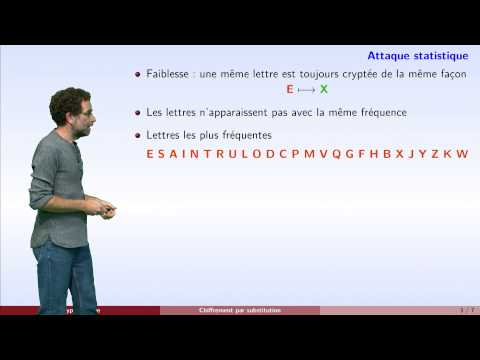

In [4]:
import IPython.display
from IPython.display import YouTubeVideo
YouTubeVideo("rUlqxHGKJ68",width=640,height=550)

## Exercice 1
On se limitera aux **lettres majuscules** afin de simplifier le codage des fonctions. 
1. Ecrire une fonction **chiffre** qui prend comme argument un caractère et qui renvoie le rang de la lettre dans l'alphabet (entier entre 0 et 25). Vous pourrez utiliser la documentation de la fonction **ord**. Vous pouvez très bien réutiliser celle du I.
2. Ecrire une fonction **dechiffre** qui prend comme argument un entier entre 0 et 25 correspondant au rang d'une lettre dans l'alphabet et qui renvoie la lettre correspondante sous forme d'un caractère. Vous pourrez utiliser la documentation de la fonction **chr**. Vous pouvez très bien réutiliser celle du I.
3. Ecrire une fonction **subst** qui prend comme argument un message sous forme d'une chaine de caractères et une chaine de caractère comportant 26 lettres servant de clé de chiffrement et qui renvoie une chaine de caractères correspondant au message crypté (les espaces et la ponctuation sont laissés en clair)
4. Ecrire une fonction **desubst** qui prend comme argument un message crypté et la clé de chiffrement et qui renvoie le message décodé.
5. Regardez la vidéo ci-dessus entre **2:14** et **6:43**. Cette attaque est-elle possible si le texte est dans une autre langue ? Expliquer ce qui changerait.

In [5]:
# 1.
def chiffre(cara):
    """
    Renvoie la position du caractère en argument dans l'alphabet.
    cara est de type str.
    """
    assert type(cara) == str, "cara soit être un caractère de type str."
    assert cara.isalpha(), "cara doit être une lettre de l'alphabet."
    assert len(cara) == 1, "cara doit être un seul caractère."
    cara2 = cara.upper()
    return ord(cara2)-65

chiffre("a")

0

In [6]:
# 2.
def dechiffre(chiffre):
    """
    Renvoie la lettre dont la position dans l'alphabet est le chiffre entré.
    chiffre est un int entre 0 et 25.
    """
    assert type(chiffre) == int, "chiffre doit être un entier."
    assert chiffre >= 0, "chiffre doit être positif."
    assert 0 <= chiffre <= 25, "chiffre doit être positif et inférieur à 50"
    return chr(chiffre+65)

dechiffre(0)

'A'

In [7]:
# 3.
def subst(texte, cle):
    """
    Renvoie le texte passé en argument crypté par substitution avec la cle.
    texte est un str.
    cle est un str de 26 lettres.
    """
    assert type(texte) == str, "texte doit être un str."
    assert type(cle) == str and len(cle) == 26, "cle doit être un str de 26 lettres."
    crypted = []
    for i in range(len(texte)):
        if texte[i].isalpha():
            crypted.append(cle[chiffre(texte[i])])
        else:
            crypted.append(texte[i])
    return "".join(crypted)

subst("saumon de norvege", "azertyuiopqsdfghjklmwxcvbn")

'lawdgf rt fgkxtut'

In [8]:
# 4.
def desubst(texte, cle):
    """
    Renvoie le texte passé en argument décrypté par substitution avec la cle.
    texte est un str.
    cle est un str de 26 lettres.
    """
    assert type(texte) == str, "texte doit être un str."
    assert type(cle) == str and len(cle) == 26, "cle doit être un str de 26 lettres."
    decrypted = []
    for i in range(len(texte)):
        if texte[i].isalpha():
            decrypted.append(dechiffre(cle.index(texte[i])))
        else:
            decrypted.append(texte[i])
    return "".join(decrypted).lower()

desubst("lawdgf rt fgkxtut", "azertyuiopqsdfghjklmwxcvbn")

'saumon de norvege'

***Question 5 :*** Si le texte était dans une autre langue, les lettres auraient des fréquences d'apparitions différentes de celles du français. Il faudrait prendre cela en compte.



In [9]:
#Liste des nombres impairs entre 10 et 30 divisible par 3 par compréhension
l = [i for i in range(10,31) if i%2 == 1 and i%3 == 0]
print(l)

#Liste des lettres majuscules avec une lettre sur 2 par compréhension
k = [chr(i+65) for i in range(26) if i%2==1]
print(k)

#Liste de 26 0 par compréhension
n = [0 for i in range(26)]
print(n, "length :", len(n))

[15, 21, 27]
['B', 'D', 'F', 'H', 'J', 'L', 'N', 'P', 'R', 'T', 'V', 'X', 'Z']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] length : 26


Regardez la vidéo du début de la feuille de **6:43** à **9:14** pour une présentation du **chiffrement de Vigenère.**

## Exercice 2
1. Ecrire une fonction **vigenere** qui prend comme argument un message sous forme d'une chaine de caractères, un entier **k** représentant la taille d'un bloc et une liste de k entiers entre 0 et 25 correspondant à la clé de chiffrement et qui renvoie le message crypté. Vous pourrez écrire d'autres fonctions au besoin afin de supprimer espaces et ponctuation du message initial.
2. Ecrire une fonction **devigenere** qui prend comme arguments, l'entier **k**, la clé, et le message crypté et qui renvoie le message décrypté sous forme de blocs de k lettres.

In [10]:
# 1
def cesar(cara, cle):
    temp = ord(cara.upper())+cle
    if temp > 25+65:
        temp -= 26
    return chr(temp)

def vigenere(texte, k, cle):
    assert type(texte) == str
    assert type(k) == int
    assert type(cle) == list or type(cle) == tuple
    assert k == len(cle)
    #Enlever les caractères qui ne sont pas des lettres
    txt = ""
    for i in texte:
        if i.isalpha():
            txt += i
    #Séparer le texte en blocs de longueur k
    ltxt = []
    for i in range(0, len(txt), k):
        temp = []
        for j in range(k):
            try:
                temp.append(txt[j+i])
            except:
                pass
        ltxt.append(temp)
    #Crypter chaque bloc avec la clé
    for i in range(len(ltxt)):
        for j in range(len(ltxt[i])):
            ltxt[i][j] = cesar(ltxt[i][j], cle[j])
    #Renvoyer le résultat
    ret = ""
    for i in range(len(ltxt)):
        ret += "".join(ltxt[i])
        ret += " "
    return ret[:-1]
    
vigenere("saumon de norvege", 4, (6,1,3,2))

'YBXO UOGG TPUX KHH'

Regardez la fin de la vidéo pour comprendre la faiblesse de cette méthode cryptographique. Nous l'utiliserons lors du prochain TD

Une des machines les plus avancées permettant un chiffrement symétrique a été développée pendant la deuxième guerre mondiale. Il s'agit de la machine Enigma. Les début de l'informatique et les travaux d'Alan Turing ont permis de casser cette méthode de chiffrement. C'est sans doute une des choses qui a fait basculer la seconde guerre mondiale.

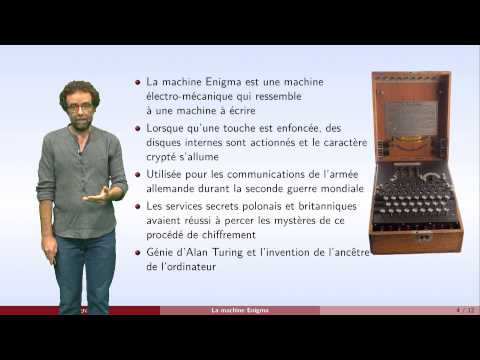

In [11]:
YouTubeVideo("oGDPtm8pYPM",width=640,height=550)

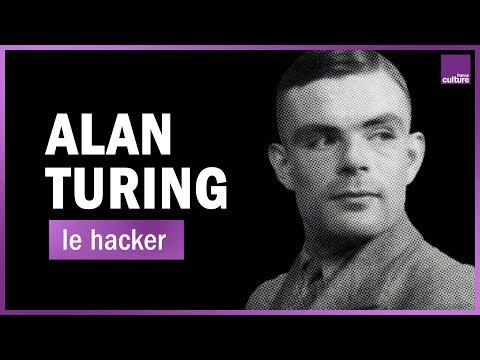

In [12]:
YouTubeVideo("PSiOtY1liI4",width=640,height=550)

<center> <a href="cours_03_3.ipynb">SUIVANT =></a></center>